In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/kaggle/input/task03/new_train.csv')

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [9]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [10]:

df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [14]:

df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [15]:
#  categorical columns
cat_cols = df.select_dtypes(include='object').columns
print('Categorical columns:', cat_cols)

# numerical columns
num_cols = df.select_dtypes(exclude='object').columns
print('Numerical columns:', num_cols)

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Numerical columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [16]:
df.describe ()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [17]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


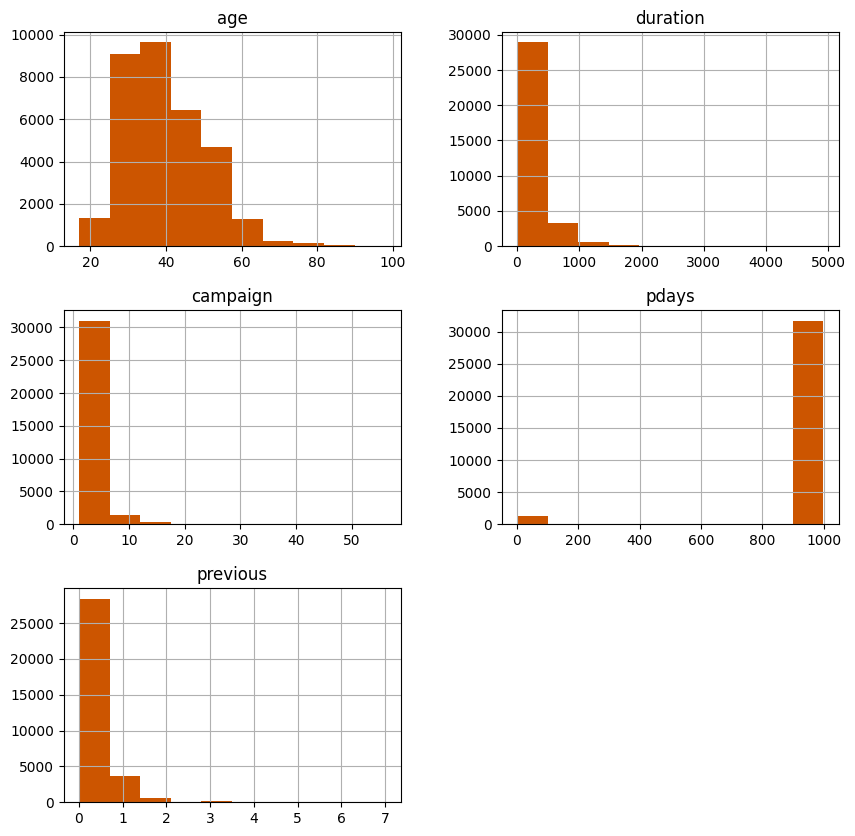

In [18]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

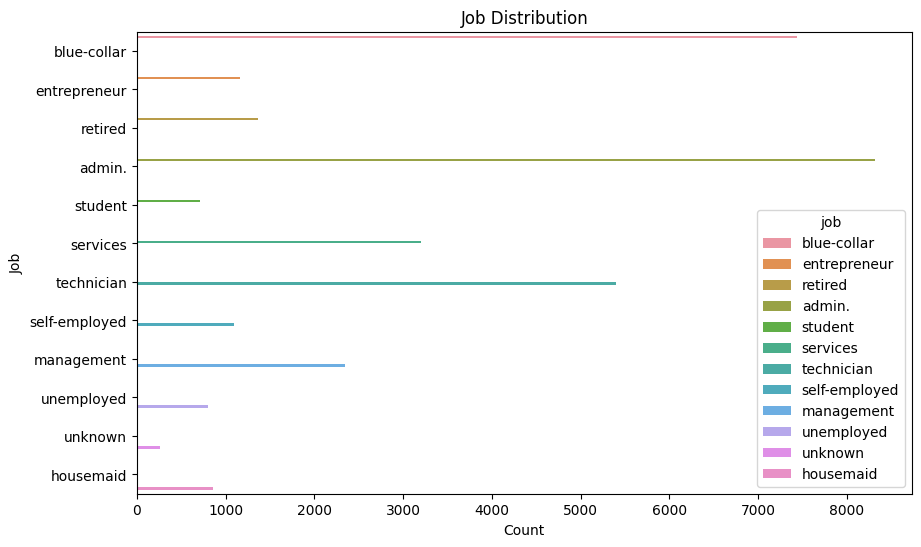

In [19]:
plt.figure(figsize=(10, 6))

sns.countplot(y='job', data=df, hue='job')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

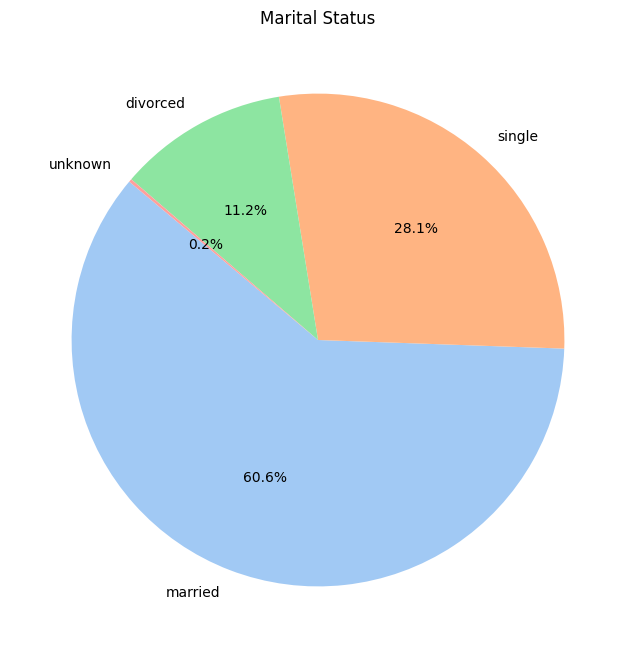

In [20]:
 #  pie chart
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Marital Status')
plt.show()

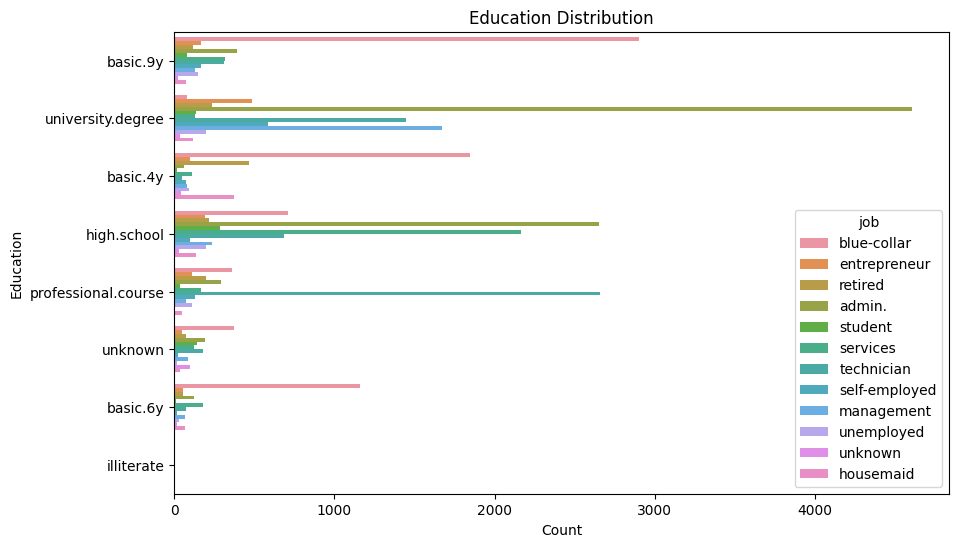

In [21]:
#education
plt.figure(figsize=(10, 6))

sns.countplot(y='education', data=df, hue='job')
plt.title('Education Distribution')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

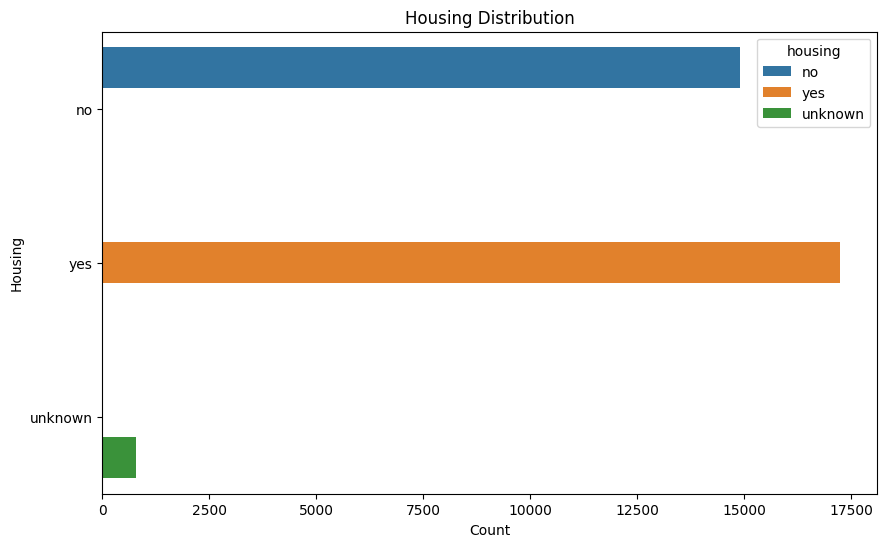

In [22]:
#housing
plt.figure(figsize=(10, 6))

sns.countplot(y='housing', data=df, hue='housing')
plt.title('Housing Distribution')
plt.xlabel('Count')
plt.ylabel('Housing')
plt.show()

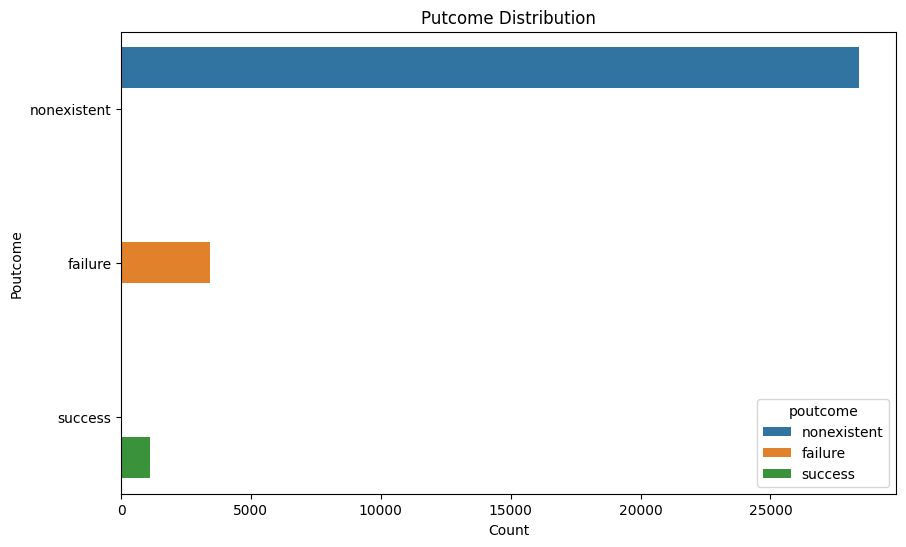

In [23]:
#poutcome
plt.figure(figsize=(10, 6))

sns.countplot(y='poutcome', data=df, hue='poutcome')
plt.title('Putcome Distribution')
plt.xlabel('Count')
plt.ylabel('Poutcome')
plt.show()

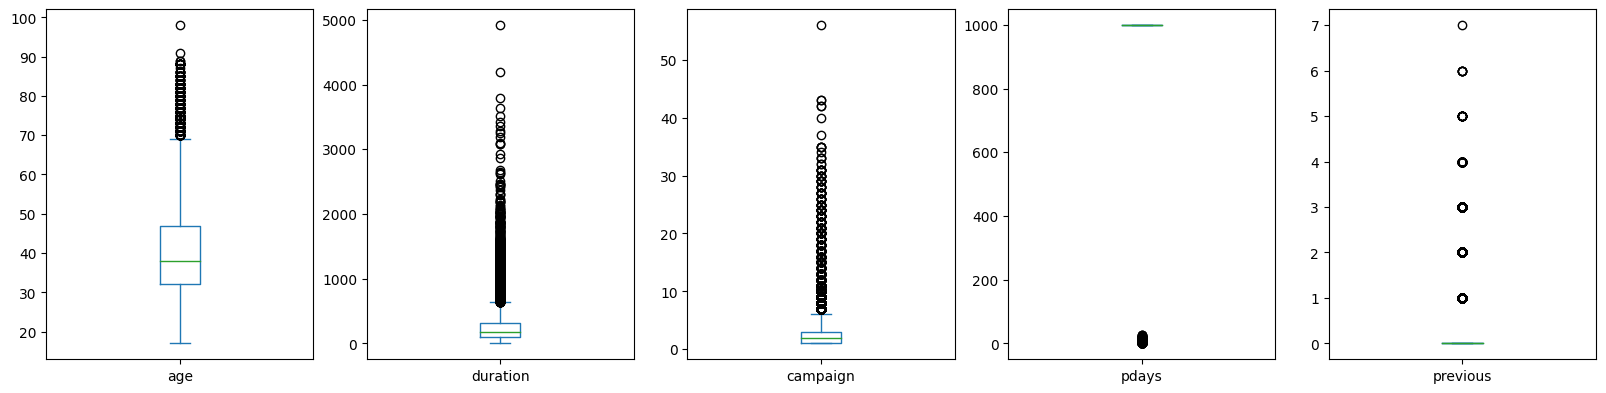

In [24]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10))
plt.show()

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8723
           1       0.45      0.51      0.48      1162

    accuracy                           0.87      9885
   macro avg       0.69      0.71      0.70      9885
weighted avg       0.88      0.87      0.87      9885



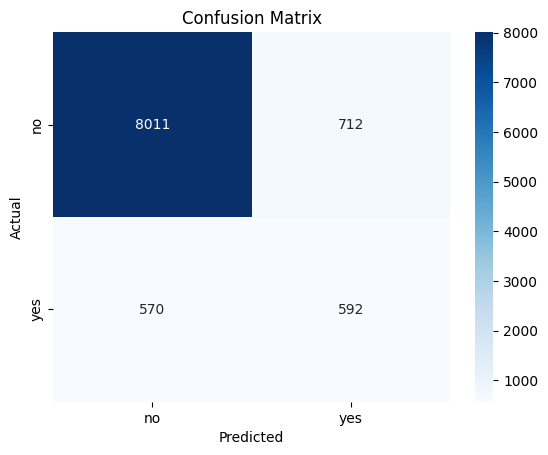

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['y'].classes_, yticklabels=label_encoders['y'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.tree import plot_tree

In [27]:
cn=['no','yes']
fn= X_train.columns
print(cn)
print(fn)

['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

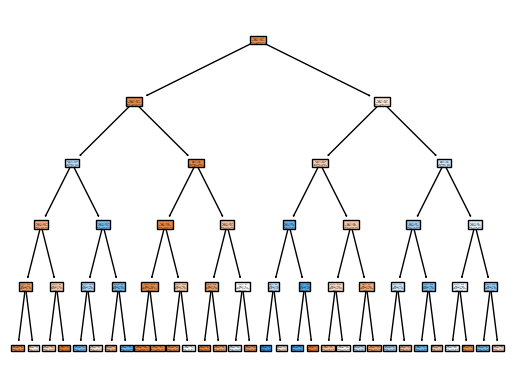

In [29]:
 plot_tree(dt,class_names=cn,filled=True)
plt.show()